In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
observations = 100 # m

x_i =np.random.uniform(low=0, high=10, size=(observations,1))
x_i = np.sort(x_i, axis=0)

In [3]:
noise = np.random.uniform(-50,50,(observations,1))
alfa_true = 2
beta_true = 3
gamma_true = 8
targets = alfa_true + x_i*beta_true + gamma_true*x_i*x_i + noise 

## Gradient Descent Solution:


In [4]:
init_range = 0.1

beta_gd,alfa_gd,gamma_gd = 0.10416243,0.17923125,0.12899188

beta_momentum,alfa_momentum,gamma_momentum = 0.10416243,0.17923125,0.12899188

loss_SGD, loss_SGD_momentum, loss_SGD_momentum99 = [],[],[]

learning_rate = 0.0005

#Initial velocities momentum = 0.9
alpha_friction = 0.9
v_alpha,v_beta,v_gamma = 0.05,0.05,0.05


#Store velocities values momentum = 0.9
list_alfa, list_beta, list_gamma = [],[],[]


In [5]:
for i in range(2000):
    
    #SGD
    outputs = (x_i*x_i*gamma_gd) + (x_i*beta_gd) + alfa_gd
    deltas = outputs - targets
    
    loss = sum(deltas**2)/2/observations
    loss_SGD.append(loss)
    
    deltas_scaled = deltas/ observations
    
    gamma_gd = gamma_gd - learning_rate * np.dot((x_i*x_i).T,deltas_scaled)
    beta_gd = beta_gd - learning_rate * np.dot(x_i.T,deltas_scaled)
    alfa_gd = alfa_gd - learning_rate * np.sum(deltas_scaled)
    
    #SGD momentum 0.9
    
    gamma_momentum_tilde = gamma_momentum + alpha_friction*v_gamma
    beta_momentum_tilde = beta_momentum + alpha_friction*v_beta
    alfa_momentum_tilde = v_alpha + alpha_friction*v_alpha
    
    outputs_m = (x_i*x_i*gamma_momentum_tilde) + (x_i*beta_momentum_tilde) + alfa_momentum_tilde
    deltas_m = outputs_m - targets
    
    loss_m = sum(deltas_m**2)/2/observations
    loss_SGD_momentum.append(loss_m)
    
    deltas_scaled_m = deltas_m/ observations
    
    v_alpha = v_alpha*alpha_friction- learning_rate * np.sum(deltas_scaled_m)
    v_beta = v_beta*alpha_friction - learning_rate * np.dot(x_i.T,deltas_scaled_m)
    v_gamma = v_gamma*alpha_friction - learning_rate * np.dot((x_i*x_i).T,deltas_scaled_m)
    
    gamma_momentum += v_gamma
    beta_momentum += v_beta
    alfa_momentum += v_alpha
    
    
    list_alfa.append(v_alpha)
    list_beta.append(float(v_beta))
    list_gamma.append(float(v_gamma))
    

In [6]:
print(alfa_gd,beta_gd, gamma_gd)
print(alfa_momentum,beta_momentum, gamma_momentum)

2.797312743238554 [[4.49330599]] [[7.87436427]]
15.385195251997674 [[5.88116204]] [[7.74646245]]


In [7]:
y_GD = alfa_gd + beta_gd*x_i + gamma_gd*x_i*x_i
y_momentum = alfa_momentum + beta_momentum*x_i + gamma_momentum*x_i*x_i

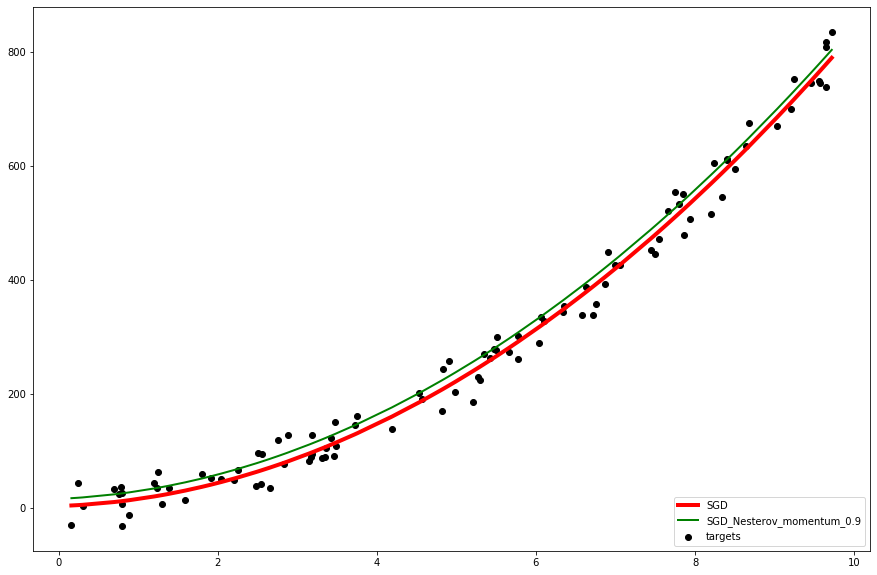

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(x_i, targets, marker='o', color='black' )
plt.plot(x_i,y_GD, color='red',linewidth=4)
plt.plot(x_i,y_momentum, color='green',linewidth=2)
plt.legend(( 'SGD','SGD_Nesterov_momentum_0.9','targets'),loc='lower right')

## SGD With Nesterov Momentum


<div style="font-size: 15px">
With the momentum term the stem of the gradient is determined also by a sequence of previous gradient calculated in the previous iterations. So the step depends on how large and how aligned the sequence of gradient are:

<div style="font-size: 20px">
\begin{array}{c}
v = \alpha v - \epsilon g , 
\end{array}
    
<div style="font-size: 20px">
\begin{array}{c}
\theta = \theta v 
\end{array}
    
<div style="font-size: 15px">
The step increase gradually if the gradients are all alined over the iterations (pointing on the same direction). 

$\alpha$ represents the friction. The bigger $\alpha$, the bigger the amount of gradient we want to store from the previous iteration. Tipically is better to start with a small value, this avoids high oscillation at the beginning and we can gradually increase it once the gradient is reducing in value.

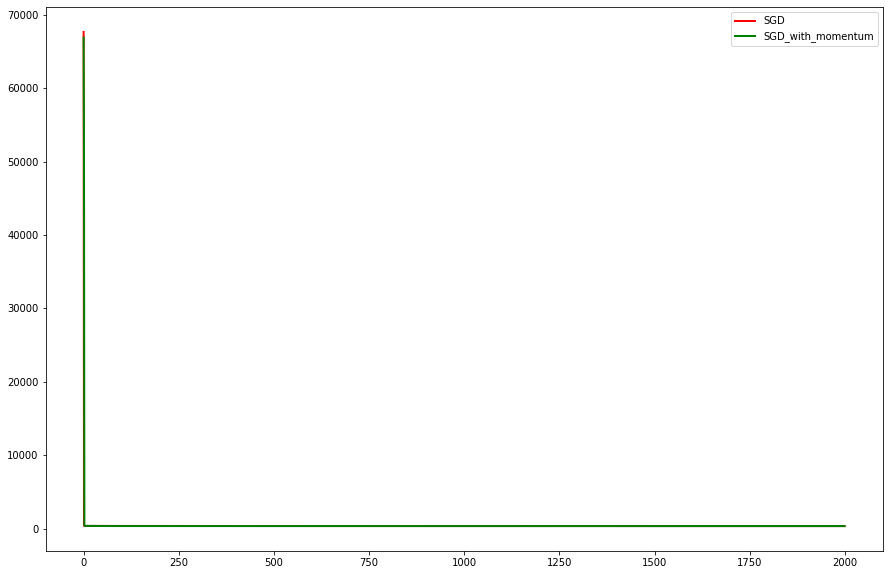

In [9]:
plt.figure(figsize=(15,10))
plt.plot(range(0,len(loss_SGD)),loss_SGD, color='red',linewidth=2)
plt.plot(range(0,len(loss_SGD_momentum)),loss_SGD_momentum, color='green',linewidth=2)
plt.legend(( 'SGD','SGD_with_momentum','SGD_with_Nesterov_momentum_0.99'),loc='upper right')

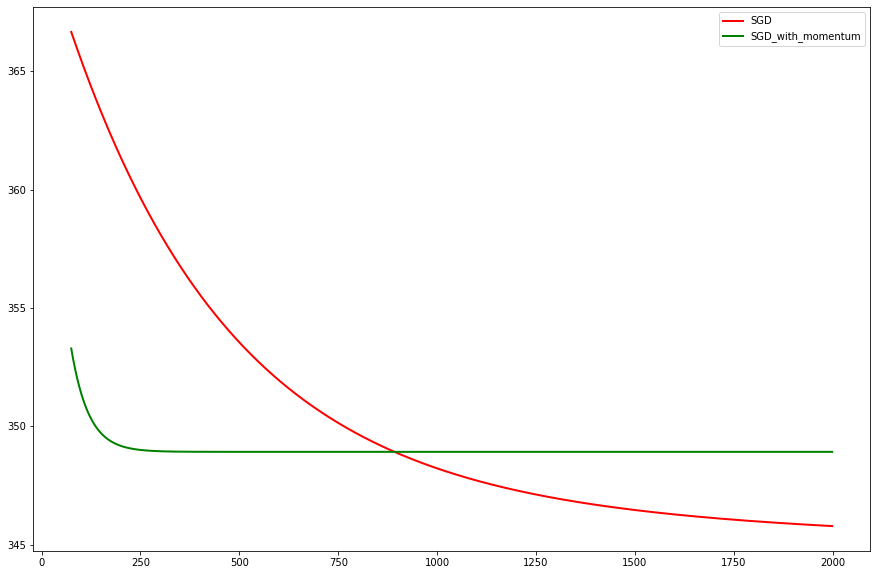

In [10]:
frame1 = loss_SGD[75:2000]
frame2 = loss_SGD_momentum[75:2000]


plt.figure(figsize=(15,10))
plt.plot(range(75,2000),frame1, color='red',linewidth=2)
plt.plot(range(75,2000),frame2, color='green',linewidth=2)
plt.legend(( 'SGD','SGD_with_momentum'),loc='upper right')

<div style="font-size: 15px">
Despite the initial oscillation, the momentum term enhance the loss decay reaching the minimum after 200 iterations. The value of loss after 1000 iterations is lower than the normal SGD case.